In [1]:
import speechbrain
import torchaudio
import numpy as np
import tensorflow

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import BatchNormalization, ELU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

In [2]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

La diferencia con los modelos anteriores es que la información o los espacios generados van comprimiendo la información de manera progresiva antes de salir. Los modelos 1,2 y 3 son bloques del mismo tamaño y solo comprimen la capa final en la fully connected.

También posee una cantidad menor de parametros (menos repeticiones de camadas convolucionales)

In [3]:
model_0 = Sequential()
model_0.add(BatchNormalization(axis = 1,input_shape=(40,1), name = "batchnorm_1"))

model_0.add(Conv1D(64, 5,padding='valid', name="conv1_1"))
model_0.add(ELU())
model_0.add(MaxPooling1D(pool_size=2,strides=1, padding='same'))

model_0.add(Conv1D(128, 5,padding='valid', name="conv1_2"))
model_0.add(ELU())
model_0.add(MaxPooling1D(pool_size=2,strides=2, padding='same'))

model_0.add(Flatten())
model_0.add(Dense(8))
model_0.add(Activation('softmax'))
opt0 = keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [4]:
model_0.build()
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batchnorm_1 (BatchNormalizat (None, 40, 1)             160       
_________________________________________________________________
conv1_1 (Conv1D)             (None, 36, 64)            384       
_________________________________________________________________
elu (ELU)                    (None, 36, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 36, 64)            0         
_________________________________________________________________
conv1_2 (Conv1D)             (None, 32, 128)           41088     
_________________________________________________________________
elu_1 (ELU)                  (None, 32, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 128)           0

In [5]:
model_0.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt0,
              metrics=['accuracy'])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
filename = '../processed_data/MFCCs_AUGMENTED_48.npy'
# open file in write mode and write data
with open(filename, 'rb') as f:
    F12 = np.load(f)
    F40 = np.load(f)
    Y = np.load(f)

In [8]:
# open file in read mode and read data 
filename = '../ML_2x_Augmentation/processed_data/mfccs_big_and_small.npy'
with open(filename, 'rb') as f:
    Xb = np.load(f)
    yb = np.load(f)
    Xs = np.load(f)
    ys = np.load(f)
    Xbl = np.load(f)
    ybl = np.load(f)
    Xsl = np.load(f)
    ysl = np.load(f)
# Check that we've recovered the right data
print(f'Xb:{Xb.shape}, yb:{yb.shape}')
print(f'Xs:{Xs.shape}, ys:{ys.shape}')
print(f'Xb:{Xbl.shape}, yb:{ybl.shape}')
print(f'Xs:{Xsl.shape}, ys:{ysl.shape}')

Xb:(1440, 40), yb:(1440,)
Xs:(1440, 12), ys:(1440,)
Xb:(1440, 40), yb:(1440,)
Xs:(1440, 12), ys:(1440,)


In [9]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(Xb, yb, test_size=0.10, random_state=42)

In [10]:
x_traincnn_b = np.expand_dims(X_train_b, axis=2)
x_testcnn_b = np.expand_dims(X_test_b, axis=2)
y_train_b = (y_train_b - 1).astype(int)
y_test_b = (y_test_b - 1).astype(int)

In [11]:
x_traincnn_b.shape

(1296, 40, 1)

In [12]:
cnnhistory=model_0.fit(x_traincnn_b, np.array(y_train_b), batch_size=16, epochs=204, validation_data=(x_testcnn_b, np.array(y_test_b)))

Epoch 1/204
81/81 [==============================] - 1s 8ms/step - loss: 2.0299 - accuracy: 0.1698 - val_loss: 1.9471 - val_accuracy: 0.2569
Epoch 2/204
81/81 [==============================] - 0s 5ms/step - loss: 1.9532 - accuracy: 0.2461 - val_loss: 1.8790 - val_accuracy: 0.3056
Epoch 3/204
81/81 [==============================] - 0s 5ms/step - loss: 1.9123 - accuracy: 0.2623 - val_loss: 1.8431 - val_accuracy: 0.2917
Epoch 4/204
81/81 [==============================] - 0s 5ms/step - loss: 1.8920 - accuracy: 0.2785 - val_loss: 1.8179 - val_accuracy: 0.3194
Epoch 5/204
81/81 [==============================] - 0s 6ms/step - loss: 1.8743 - accuracy: 0.2785 - val_loss: 1.8027 - val_accuracy: 0.3125
Epoch 6/204
81/81 [==============================] - 0s 5ms/step - loss: 1.8493 - accuracy: 0.3117 - val_loss: 1.7831 - val_accuracy: 0.3264
Epoch 7/204
81/81 [==============================] - 0s 6ms/step - loss: 1.8313 - accuracy: 0.3187 - val_loss: 1.7698 - val_accuracy: 0.3333
Epoch 8/204
8

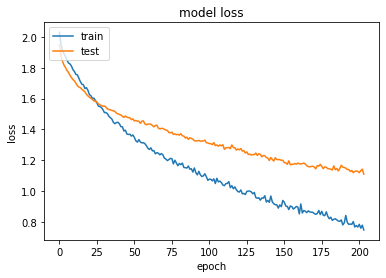

In [13]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

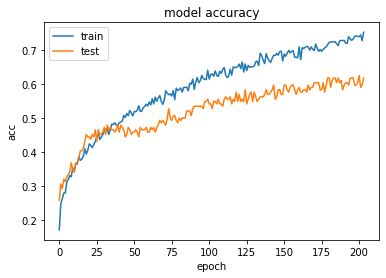

In [14]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model_1 = Sequential()
model_1.add(BatchNormalization(axis = 1,input_shape=(40,1), name = "batchnorm_1"))

model_1.add(Conv1D(64, 5,padding='valid', name="conv1_1"))
model_1.add(ELU())
model_1.add(MaxPooling1D(pool_size=2,strides=1, padding='same'))

model_1.add(Conv1D(128, 5,padding='valid', name="conv1_2"))
model_1.add(ELU())
model_1.add(MaxPooling1D(pool_size=2,strides=2, padding='same'))

model_1.add(Conv1D(128, 5,padding='valid', name="conv1_3"))
model_1.add(ELU())
model_1.add(MaxPooling1D(pool_size=2,strides=2, padding='same'))

model_1.add(Conv1D(128, 5,padding='valid', name="conv1_4"))
model_1.add(ELU())
model_1.add(MaxPooling1D(pool_size=2,strides=2, padding='same'))

model_1.add(Flatten())
model_1.add(Dense(8))
model_1.add(Activation('softmax'))

model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt0,
              metrics=['accuracy'])

In [16]:
model_1.build()
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batchnorm_1 (BatchNormalizat (None, 40, 1)             160       
_________________________________________________________________
conv1_1 (Conv1D)             (None, 36, 64)            384       
_________________________________________________________________
elu_2 (ELU)                  (None, 36, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 36, 64)            0         
_________________________________________________________________
conv1_2 (Conv1D)             (None, 32, 128)           41088     
_________________________________________________________________
elu_3 (ELU)                  (None, 32, 128)           0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 16, 128)          

In [17]:
cnnhistory=model_1.fit(x_traincnn_b, np.array(y_train_b), batch_size=16, epochs=204, validation_data=(x_testcnn_b, np.array(y_test_b)))

Epoch 1/204
81/81 [==============================] - 1s 10ms/step - loss: 2.0174 - accuracy: 0.1921 - val_loss: 1.8825 - val_accuracy: 0.2847
Epoch 2/204
81/81 [==============================] - 1s 8ms/step - loss: 1.9527 - accuracy: 0.2269 - val_loss: 1.8592 - val_accuracy: 0.2778
Epoch 3/204
81/81 [==============================] - 1s 8ms/step - loss: 1.9145 - accuracy: 0.2438 - val_loss: 1.8358 - val_accuracy: 0.2917
Epoch 4/204
81/81 [==============================] - 1s 8ms/step - loss: 1.8961 - accuracy: 0.2701 - val_loss: 1.8211 - val_accuracy: 0.2708
Epoch 5/204
81/81 [==============================] - 1s 9ms/step - loss: 1.8789 - accuracy: 0.2685 - val_loss: 1.8162 - val_accuracy: 0.2986
Epoch 6/204
81/81 [==============================] - 1s 8ms/step - loss: 1.8527 - accuracy: 0.2940 - val_loss: 1.7938 - val_accuracy: 0.3056
Epoch 7/204
81/81 [==============================] - 1s 8ms/step - loss: 1.8375 - accuracy: 0.3017 - val_loss: 1.7910 - val_accuracy: 0.3056
Epoch 8/204


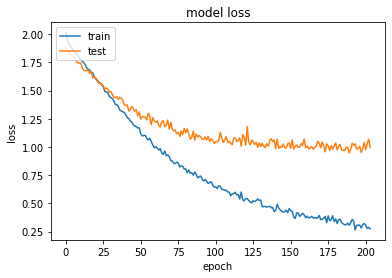

In [18]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

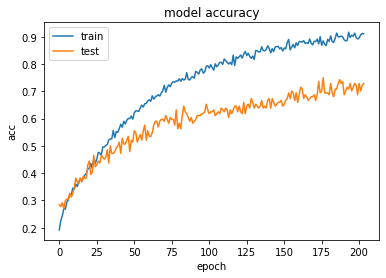

In [19]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

La profundidad de la red afecta el rendimiento, agregar dos o tres camadas más mejora el rendimiento sobre el conjunto de entrenamiento. Sin embargo, sobre le conjunto de test no. El proceso de aumentación debe considerar un paso antes del split:
dejar el audio orginal y su duplicado en el mismo conjunto. Se debe evitar separar los audios, por este motivo cuando agrego aumentación el modelo obtiene mejores resultados y un rendimiento mejor sobre le conjunto de test!. 

Eligiendo solo la aumentacion por 2, el modelo obtiene otros resultados!

In [23]:
!pip install -q -U keras-tuner

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [25]:
import keras_tuner as kt

### Ejemplo
```python
def model_builder(hp):
  '''
  Builds the model and sets up the hyperparameters to tune.

  Args:
    hp - Keras tuner object

  Returns:
    model with hyperparameters to tune
  '''

  # Initialize the Sequential API and start stacking the layers
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  hp_activation = hp.Choice('activation function',['relu','sigmoid'])
  model.add(keras.layers.Dense(units=hp_units, activation=  hp_activation , name='dense_1'))

  # Add next layers
  hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
  model.add(keras.layers.Dropout(hp_dropout))
  model.add(keras.layers.Dense(10, activation='softmax'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

  return model
```